### Importin libraries

In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### data Preprocessing

#### Training image Preprocessing

> Dataset Link ======> https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [55]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


#### Validation Image Preprocessing

In [56]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [57]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [58]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[119.75 114.75 118.75]
   [122.25 117.25 121.25]
   [124.5  119.5  123.5 ]
   ...
   [157.25 155.25 160.25]
   [157.5  155.5  160.5 ]
   [157.25 155.25 160.25]]

  [[125.   120.   124.  ]
   [116.25 111.25 115.25]
   [123.5  118.5  122.5 ]
   ...
   [159.   157.   162.  ]
   [163.   161.   166.  ]
   [166.25 164.25 169.25]]

  [[128.25 123.25 127.25]
   [130.25 125.25 129.25]
   [124.25 119.25 123.25]
   ...
   [158.5  156.5  161.5 ]
   [161.   159.   164.  ]
   [162.5  160.5  165.5 ]]

  ...

  [[122.5  118.5  119.5 ]
   [123.   119.   120.  ]
   [124.25 120.25 121.25]
   ...
   [153.75 151.75 156.75]
   [155.   153.   158.  ]
   [157.5  155.5  160.5 ]]

  [[122.25 118.25 119.25]
   [126.   122.   123.  ]
   [125.   121.   122.  ]
   ...
   [150.25 148.25 153.25]
   [152.   150.   155.  ]
   [153.75 151.75 156.75]]

  [[119.5  115.5  116.5 ]
   [123.25 119.25 120.25]
   [128.   124.   125.  ]
   ...
   [150.75 148.75 153.75]
   [155.25 153.25 158.25]
   [157.   155.   16

### To avoid overfitting
1. Choose small learning rate default is 0.001 we are taking 0.0001
2. There may be chance of underfitting, so increase number of neurons
3. Add more Convolution layer to extract more features from images there may be possibilty that model unable to capture relevent feature or model is confusing due to lack of feature so feed with more feature

### Building Model

In [59]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [60]:
model = Sequential()

#### Building Convolution Layer
#####  -------------> https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [61]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [62]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [63]:
model.add(Conv2D(filters = 128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [64]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [65]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [66]:
model.add(Dropout(0.25)) # to avoid overfitting

In [67]:
model.add(Flatten())

In [68]:
model.add(Dense(units=1500,activation='relu'))

In [69]:
model.add(Dropout(0.4))

In [70]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling model

In [71]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [73]:
training_history = model.fit(x= training_set,validation_data= validation_set,epochs= 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1036s 471ms/step - accuracy: 0.3730 - loss: 2.2321 - val_accuracy: 0.8506 - val_loss: 0.4877
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 990s 451ms/step - accuracy: 0.8291 - loss: 0.5406 - val_accuracy: 0.9089 - val_loss: 0.2904
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 978s 445ms/step - accuracy: 0.8982 - loss: 0.3144 - val_accuracy: 0.9249 - val_loss: 0.2386
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 979s 445ms/step - accuracy: 0.9328 - loss: 0.2061 - val_accuracy: 0.9455 - val_loss: 0.1712
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 977s 445ms/step - accuracy: 0.9509 - loss: 0.1502 - val_accuracy: 0.9636 - val_loss: 0.1174
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 977s 445ms/step - accuracy: 0.9615 - loss: 0.1169 - val_accuracy: 0.9655 - val_loss: 0.1095
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 976s 444ms/step - accuracy: 0.9702 - loss: 0.0899 - val_accuracy: 0.9603 - val_loss: 0.1306
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 975s 444ms/step - a

In [74]:
from keras.models import load_model

In [75]:
# Load the model
model = load_model('trained_model.h5')

# Reset optimizer state
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

### Model evaluation

In [76]:
# model evolution on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 226s 103ms/step - accuracy: 0.9966 - loss: 0.0112


In [77]:
print(train_loss,train_acc)

0.011748374439775944 0.9965858459472656


In [78]:
# Model evolution in validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.9754 - loss: 0.0825


In [79]:
print(val_loss,val_acc)

0.08082801103591919 0.9761552214622498


### Saving Model

In [80]:
model.save("trained_model.h5")  # file has large size


In [81]:
model.save("trained_model.keras") # file has small size

In [82]:
training_history.history

{'accuracy': [0.5809801816940308,
  0.8527206778526306,
  0.9096379280090332,
  0.938359797000885,
  0.9543352723121643,
  0.9627569317817688,
  0.9707660675048828,
  0.9754605293273926,
  0.9777224659919739,
  0.9816345572471619],
 'loss': [1.4304755926132202,
  0.4646015167236328,
  0.2784750461578369,
  0.1887008398771286,
  0.13927671313285828,
  0.11179682612419128,
  0.08869503438472748,
  0.07391823083162308,
  0.06790012121200562,
  0.055021751672029495],
 'val_accuracy': [0.850614607334137,
  0.90888911485672,
  0.9248805046081543,
  0.9454814195632935,
  0.9635784029960632,
  0.9654564261436462,
  0.9603345990180969,
  0.9689847230911255,
  0.9597086310386658,
  0.9608467817306519],
 'val_loss': [0.4876544177532196,
  0.29040488600730896,
  0.23855406045913696,
  0.17120949923992157,
  0.11735747754573822,
  0.10951945930719376,
  0.13060307502746582,
  0.10067128390073776,
  0.12978479266166687,
  0.14129504561424255]}

In [83]:
# Recording History in JSON

import json
with open('history.json', 'w') as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

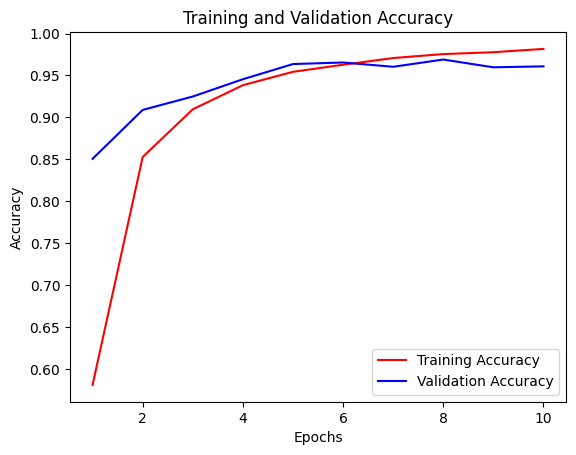

In [84]:
epochs = [i for i in range(1,11)]

plt.plot(epochs, training_history.history['accuracy'],color = 'red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color = 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Some other metricsfor model evaluation

In [85]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [86]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [87]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 57s 104ms/step


array([[1.0000000e+00, 8.2314620e-11, 2.3523628e-13, ..., 2.9741601e-16,
        5.7137396e-16, 7.3760739e-15],
       [1.0000000e+00, 4.6171768e-11, 3.2138729e-11, ..., 4.1179350e-15,
        9.0066555e-15, 1.7337618e-14],
       [1.0000000e+00, 1.1651178e-12, 4.4684274e-14, ..., 1.0113771e-18,
        2.7870332e-17, 1.8717914e-15],
       ...,
       [3.1928183e-15, 1.2007658e-17, 7.1916632e-13, ..., 3.4512424e-17,
        3.2952702e-18, 1.0000000e+00],
       [1.9121592e-12, 7.9199815e-16, 1.3005174e-11, ..., 6.9563004e-15,
        8.9375836e-16, 1.0000000e+00],
       [5.8348599e-17, 7.5444119e-19, 7.8860054e-16, ..., 7.3617787e-19,
        2.1156347e-16, 1.0000000e+00]], dtype=float32)

In [88]:
y_pred.shape

(17572, 38)

In [89]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [90]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [91]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [92]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [93]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

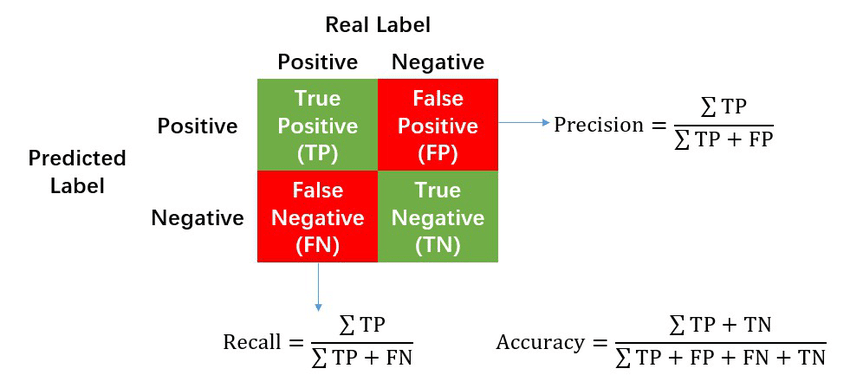

In [96]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
classification_report(y_true,predicted_categories,target_names= class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.99      0.98      0.98       504\n                                 Apple___Black_rot       0.99      0.98      0.99       497\n                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440\n                                   Apple___healthy       0.98      0.97      0.98       502\n                               Blueberry___healthy       0.98      0.98      0.98       454\n          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421\n                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.95      0.92       410\n                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.96      

In [98]:
cm = confusion_matrix(y_true,predicted_categories)
cm.shape

(38, 38)

### Confusion matrix visualization

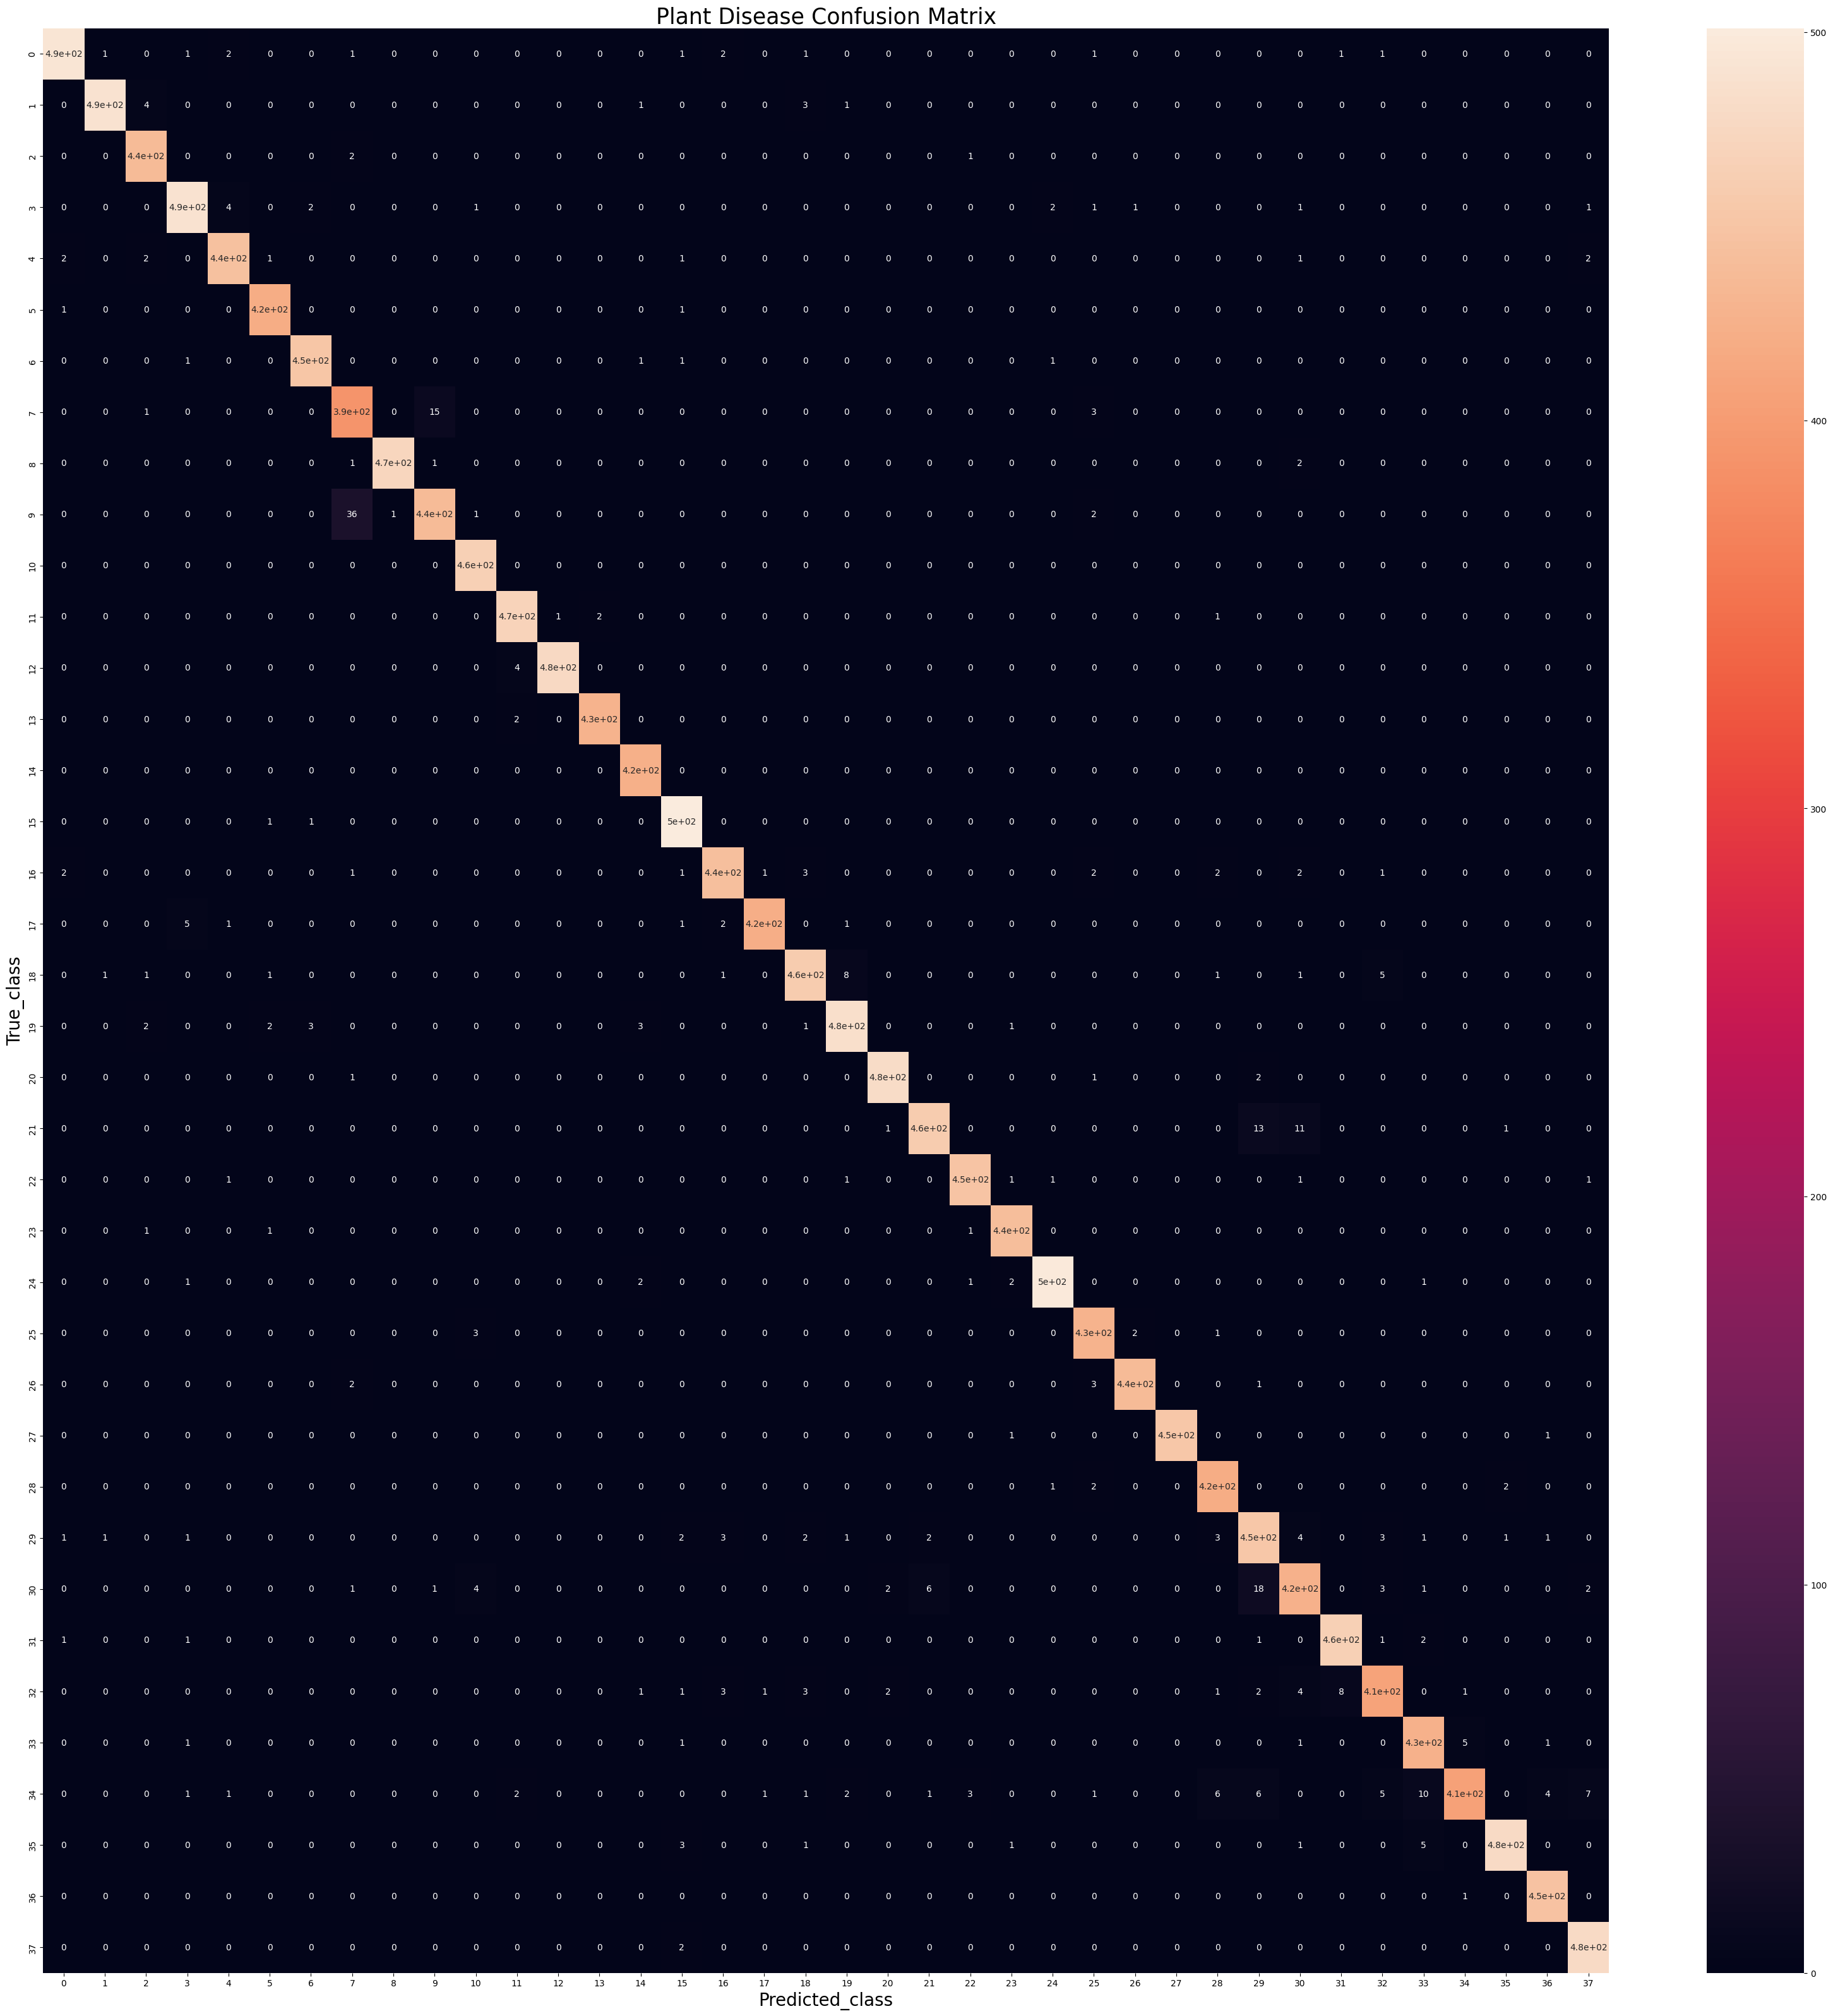

In [109]:
plt.figure(figsize= (40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted_class",fontsize=20)
plt.ylabel("True_class",fontsize=20)
plt.title("Plant Disease Confusion Matrix",fontsize = 25)
plt.show()